## Exploratory Data Analysis - Online Shopping in Retail

## Milestone 3

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("customer_activity.csv")
print("Data loaded successfully!")


Data loaded successfully!


##### The very first task is to convert to the dataframe to the correct datetime format, correct categorycal and numerical format and next, we will view the dataframe to confirm these transformations have taken place. Then finally, a copy will be saved so as not to alter the original dataframe. 

In [3]:
class DataTransform:
    def __init__(self, df):
        """Save the DataFrame."""
        self.df = df.copy()  # Make a copy to avoid modifying the original

    def convert_to_datetime(self, column):
        """Change a column to datetime format."""
        if column in self.df.columns:
            self.df[column] = pd.to_datetime(self.df[column], errors='coerce')

    def convert_to_category(self, column):
        """Change a column to a category."""
        if column in self.df.columns:
            self.df[column] = self.df[column].astype('category')

    def convert_to_numeric(self, column):
        """Change a column to a number, setting errors to NaN."""
        if column in self.df.columns:
            self.df[column] = pd.to_numeric(self.df[column], errors='coerce')

    def transform(self):
        """Apply all changes."""
        # Convert these columns to category
        for col in ['month', 'weekend', 'revenue']:
            self.convert_to_category(col)

        # Convert these columns to numbers
        for col in ['product_related_duration', 'administrative_duration']:
            self.convert_to_numeric(col)

        print("Data transformation complete.")
        return self.df  # Return the updated DataFrame

    def show_column_types(self):
        """Print the data types of all columns after transformation."""
        print("\nColumn Data Types After Transformation:")
        print(self.df.dtypes)


In [4]:
# Create an instance of DataTransform
transformer = DataTransform(df)

# Apply transformations
df_transformed = transformer.transform()

# Show the first few rows
print("\nTransformed DataFrame:")
print(df_transformed.head())

# Show the updated column types
transformer.show_column_types()

Data transformation complete.

Transformed DataFrame:
   administrative  administrative_duration  informational  \
0             0.0                      0.0              0   
1             0.0                      0.0              0   
2             2.0                     99.4              0   
3             0.0                      0.0              0   
4             0.0                      0.0              0   

   informational_duration  product_related  product_related_duration  \
0                     0.0              4.0                       0.0   
1                     0.0             26.0                     876.0   
2                     0.0             19.0                     368.0   
3                     0.0             20.0                    1432.0   
4                     0.0             33.0                     694.0   

   bounce_rates  exit_rates  page_values month operating_systems  \
0        0.2000       0.200          0.0   May           Android   
1        0

In [6]:
df_transformed.to_csv("transformed_data.csv", index=False)
print("Transformed data saved as transformed_data.csv")

Transformed data saved as transformed_data.csv


##### Now that we have the correct datetime format. The next task is to check the dataframe for null values

In [9]:
df.isnull().sum()

administrative              570
administrative_duration     912
informational                 0
informational_duration      336
product_related             579
product_related_duration    201
bounce_rates                  0
exit_rates                    0
page_values                   0
month                         0
operating_systems            11
browser                       0
region                        0
traffic_type                  0
visitor_type                  0
weekend                       0
revenue                       0
dtype: int64

##### From the output above, we can see null values in some columns. So our next task is to impute the null columns with either mean, median or mode. For numerical colums, I be using mean and median, depending on skew > 1, and for categorical colums, I will use mode. 

##### Then will print to ensure all null columns have been fully transformed and will then save the dataframe as 'transformed_data_no_null.csv' for further analysis

In [7]:
''' Here determines which columns should be imputed with mean, median or mode and print to check values.'''
import pandas as pd

class DataFrameTransform:
    def __init__(self, df):
        self.df = df

    def impute_missing_values(self):
        """ Impute missing values in numerical and categorical columns."""
        
        # Handle numerical columns first
        for column in self.df.select_dtypes(include=['number']).columns:
            if self.df[column].isnull().sum() > 0:
                if self.df[column].skew() > 1:
                    self.df[column] = self.df[column].fillna(self.df[column].median())  # Use median
                else:
                    self.df[column] = self.df[column].fillna(self.df[column].mean())  # Use mean

        # Then handle categorical columns (fill with most frequent value)
        for column in self.df.select_dtypes(include=['object']).columns:
            if self.df[column].isnull().sum() > 0:
                self.df[column] = self.df[column].fillna(self.df[column].mode()[0])

        return self.df

# Load the dataset
df_cleaned = pd.read_csv("transformed_data.csv")

# Initialise the class
df_transform = DataFrameTransform(df_cleaned)

# Impute missing values
df_cleaned = df_transform.impute_missing_values()

# Check if NULL values are removed
print(df_cleaned.isnull().sum())


administrative              0
administrative_duration     0
informational               0
informational_duration      0
product_related             0
product_related_duration    0
bounce_rates                0
exit_rates                  0
page_values                 0
month                       0
operating_systems           0
browser                     0
region                      0
traffic_type                0
visitor_type                0
weekend                     0
revenue                     0
dtype: int64


In [8]:
df_transformed.to_csv("transformed_data_no_null.csv", index=False)
print("Transformed data saved as transformed_data_no_null.csv")

Transformed data saved as transformed_data_no_null.csv


#### The plotter class below further shows there are no more missing values, meaning all nulls have been removed.

In [11]:
class Plotter:
    def __init__(self, df):
        """Initialize with a DataFrame."""
        self.df = df

    def plot_nulls(self):
        """Visualizes missing data with a bar chart, only showing columns with NULL values."""
        null_count = self.df.isnull().sum()
        null_count = null_count[null_count > 0]  # Only show columns with missing data
        if not null_count.empty:
            null_count.plot(kind='bar', figsize=(12, 6))
            plt.title("Missing Data Count")
            plt.ylabel("Number of NULLs")
            plt.xlabel("Columns")
            plt.show()
        else:
            print("No missing values to visualize.")

# Instantiate and plot missing values
plotter = Plotter(df_cleaned)
plotter.plot_nulls()


No missing values to visualize.


##### Next task, we will be looking into skewed columns. First we will identify those columns which are skewed and then carry out some transformation on them to reduce the skewness

Skewed Columns: ['administrative', 'administrative_duration', 'informational', 'informational_duration', 'product_related', 'product_related_duration', 'bounce_rates', 'exit_rates', 'page_values']


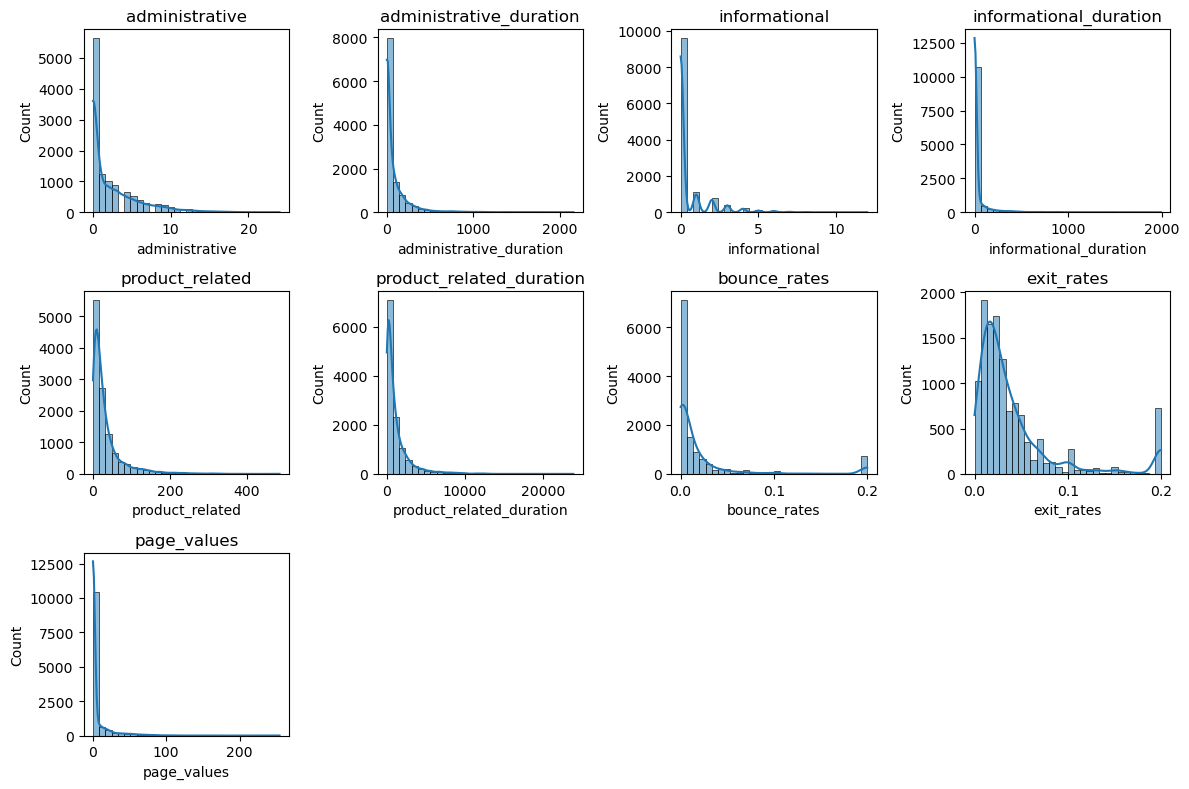

In [13]:
class DataFrameTransform:
    def __init__(self, df):
        """Initialise with a DataFrame."""
        self.df = df

    def identify_skewed_columns(self, threshold=1):
        """Find columns with skewness above the given threshold."""
        numeric_cols = self.df.select_dtypes(include=[np.number]).columns
        skewness = self.df[numeric_cols].skew()
        skewed_cols = skewness[abs(skewness) > threshold].index.tolist()
        print("Skewed Columns:", skewed_cols)
        return skewed_cols


class Plotter:
    def __init__(self, df):
        """Initialise with the DataFrame."""
        self.df = df

    def plot_skewed_columns(self, columns):
        """Plot histograms of skewed columns to visualise their distributions before transformation."""
        if not columns:
            print("No skewed columns to visualise.")
            return
        
        plt.figure(figsize=(12, 8))
        for i, col in enumerate(columns, 1):
            plt.subplot(3, 4, i)
            sns.histplot(self.df[col], bins=30, kde=True)
            plt.title(col)
        plt.tight_layout()
        plt.show()

# Load data and check for skewed columns
if __name__ == "__main__":
    df_cleaned = pd.read_csv("transformed_data_no_null.csv")
    
    # Identify skewed columns
    transform = DataFrameTransform(df_cleaned)
    skewed_cols = transform.identify_skewed_columns()  # Get the list of skewed columns
    
    if skewed_cols:  
        # Visualise before transformation
        plotter = Plotter(df_cleaned)
        plotter.plot_skewed_columns(skewed_cols)
    else:
        print("No skewed columns found that exceed the threshold.")


##### Now that we have identified the skewed columns, the next step is to transform these columns using Yeo_Johnson as this will handle both positives and negative values. Yeo_Johnson was chosen over Box-cox because Box-cox only focuses on positive values unlike Yeo-Johnson which focuses on both positives and negatives.

In [18]:
import pandas as pd
import numpy as np
from scipy.stats import yeojohnson

class DataFrameTransform:
    def __init__(self, df):
        """Initialise with a DataFrame."""
        self.df = df

    def clean_column(self, col):
        """Replace NaNs with median and infinities with max finite value."""
        if self.df[col].isna().sum() > 0:
            median_value = self.df[col].median()
            self.df[col].fillna(median_value, inplace=True)

        if np.isinf(self.df[col]).sum() > 0:
            max_finite = self.df[col][~np.isinf(self.df[col])].max()
            self.df[col].replace([np.inf, -np.inf], max_finite, inplace=True)

    def transform_skewed_columns(self, columns):
        """Apply Yeo-Johnson transformation after handling NaN and infinite values."""
        for col in columns:
            self.clean_column(col)  # Handle NaN and infinite values
            self.df[col], _ = yeojohnson(self.df[col])
            print(f"Applied Yeo-Johnson transformation to '{col}'")

        return self.df

# Load data
if __name__ == "__main__":
    df_cleaned = pd.read_csv("transformed_data_no_null.csv")

    # Define the specified skewed columns
    skewed_cols = [
        'administrative', 'administrative_duration', 'informational', 
        'informational_duration', 'product_related', 'product_related_duration', 
        'bounce_rates', 'exit_rates', 'page_values'
    ]

    # Transform skewed columns
    transform = DataFrameTransform(df_cleaned)
    df_transformed = transform.transform_skewed_columns(skewed_cols)

    # Save transformed dataset
    df_transformed.to_csv("transformed_data_no_skew.csv", index=False)
    print("Transformed dataset saved as 'transformed_data_no_skew.csv'.")


Applied Yeo-Johnson transformation to 'administrative'
Applied Yeo-Johnson transformation to 'administrative_duration'
Applied Yeo-Johnson transformation to 'informational'
Applied Yeo-Johnson transformation to 'informational_duration'
Applied Yeo-Johnson transformation to 'product_related'
Applied Yeo-Johnson transformation to 'product_related_duration'
Applied Yeo-Johnson transformation to 'bounce_rates'
Applied Yeo-Johnson transformation to 'exit_rates'
Applied Yeo-Johnson transformation to 'page_values'
Transformed dataset saved as 'transformed_data_no_skew.csv'.


/var/folders/fz/44yjv3cd7cg9ly7n7124xgw00000gn/T/ipykernel_55420/2122970513.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  self.df[col].fillna(median_value, inplace=True)


##### After carrying out Yeo-Johnson transformation on the skewed columns, we then move on to visualise the effects of the transformation on the skewed columns.

In [19]:

class Plotter:
    def __init__(self, df):
        """Initialise with the DataFrame."""
        self.df = df

    def plot_skewed_columns_after(self, columns):
        """Plot histograms of skewed columns after transformation."""
        if not columns:
            print("No skewed columns to visualise.")
            return
        
        plt.figure(figsize=(12, 8))
        for i, col in enumerate(columns, 1):
            plt.subplot(3, 3, i)  # 3x3 grid
            sns.histplot(self.df[col], bins=30, kde=True)
            plt.title(f"{col} (After Transformation)")
        plt.tight_layout()
        plt.show()


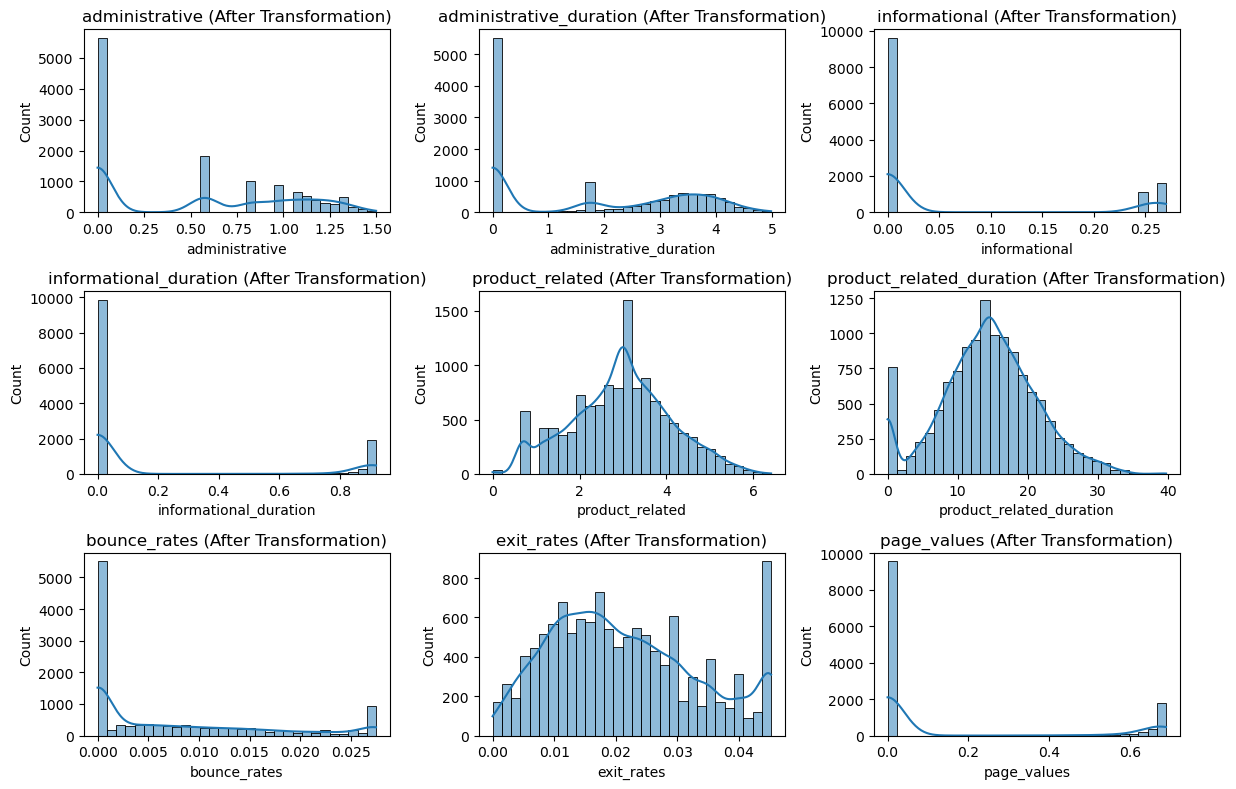

In [20]:
plotter = Plotter(df_transformed)
plotter.plot_skewed_columns_after(skewed_cols)


##### Now that we have handled the skewed columns, next, lets deal with the outliers. To do this, first lets visualise the outliers and then attemopt to transform them.

Columns with Outliers: ['informational', 'informational_duration', 'product_related', 'product_related_duration', 'page_values']


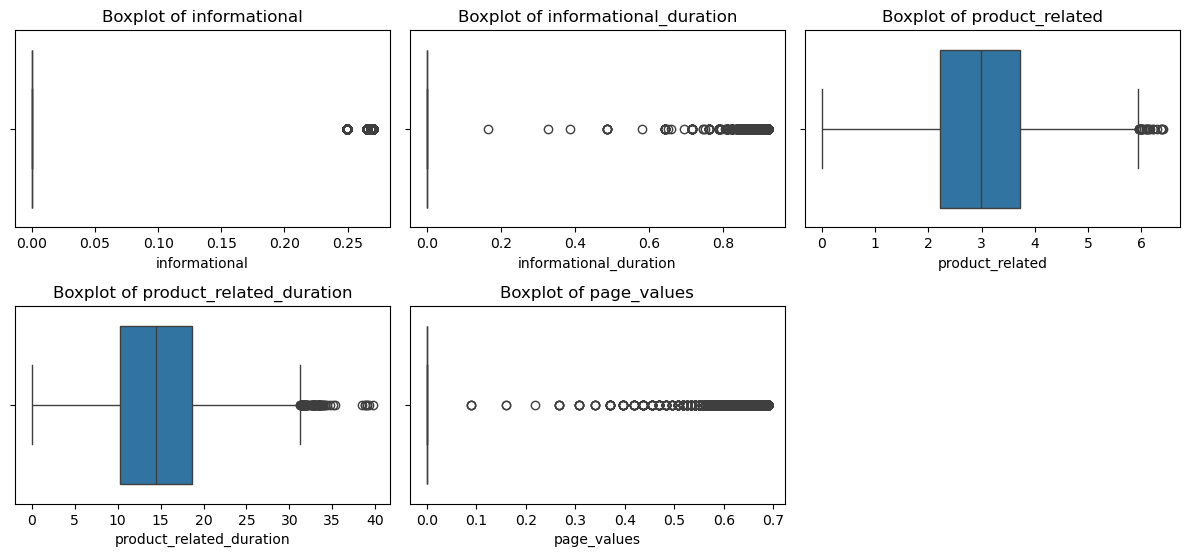

In [24]:

df = pd.read_csv("transformed_data_no_skew.csv")

# Identify columns with outliers using the IQR method
def identify_outliers(df):
    """Identify columns with outliers based on the IQR method."""
    num_cols = df.select_dtypes(include=['number']).columns
    Q1 = df[num_cols].quantile(0.25)
    Q3 = df[num_cols].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find columns with outliers
    outlier_cols = [col for col in num_cols if ((df[col] < lower_bound[col]) | (df[col] > upper_bound[col])).any()]
    print("Columns with Outliers:", outlier_cols)
    return outlier_cols

# Plot outliers using boxplots
def plot_outliers(df, outlier_cols):
    """Plot boxplots for columns with outliers."""
    if not outlier_cols:
        print("No outliers detected.")
        return

    plt.figure(figsize=(12, 8))
    for i, col in enumerate(outlier_cols, 1):
        plt.subplot(3, 3, i)  # 3x3 grid
        sns.boxplot(x=df[col])
        plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()

# Identify and plot outliers
outlier_cols = identify_outliers(df)
plot_outliers(df, outlier_cols)


##### The Boxplot above shows us the columns with outliers: informational', 'informational_duration', 'product_related', 'product_related_duration', 'page_values'. Next, we go ahead to transform them

In [25]:
# Load the dataset
df = pd.read_csv("transformed_data_no_skew.csv")

# Columns to handle outliers for
outlier_cols = ['informational', 'informational_duration', 'product_related', 'product_related_duration', 'page_values']

# Function to remove outliers using the IQR method
def remove_outliers(df, columns):
    """Remove outliers using the IQR method for specified columns."""
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove rows where outliers exist in any of the specified columns
    df_filtered = df[~((df[columns] < lower_bound) | (df[columns] > upper_bound)).any(axis=1)].copy()
    
    print(f"Outliers removed from columns: {columns}")
    return df_filtered

# Remove outliers
df_cleaned = remove_outliers(df, outlier_cols)

# Save the cleaned dataset
df_cleaned.to_csv("transformed_data_no_outliers.csv", index=False)
print("Transformed dataset with no outliers saved as 'transformed_data_no_outliers.csv'.")


Outliers removed from columns: ['informational', 'informational_duration', 'product_related', 'product_related_duration', 'page_values']
Transformed dataset with no outliers saved as 'transformed_data_no_outliers.csv'.


##### After removing the outliers from the identified columns, lets visualise to see the difference.

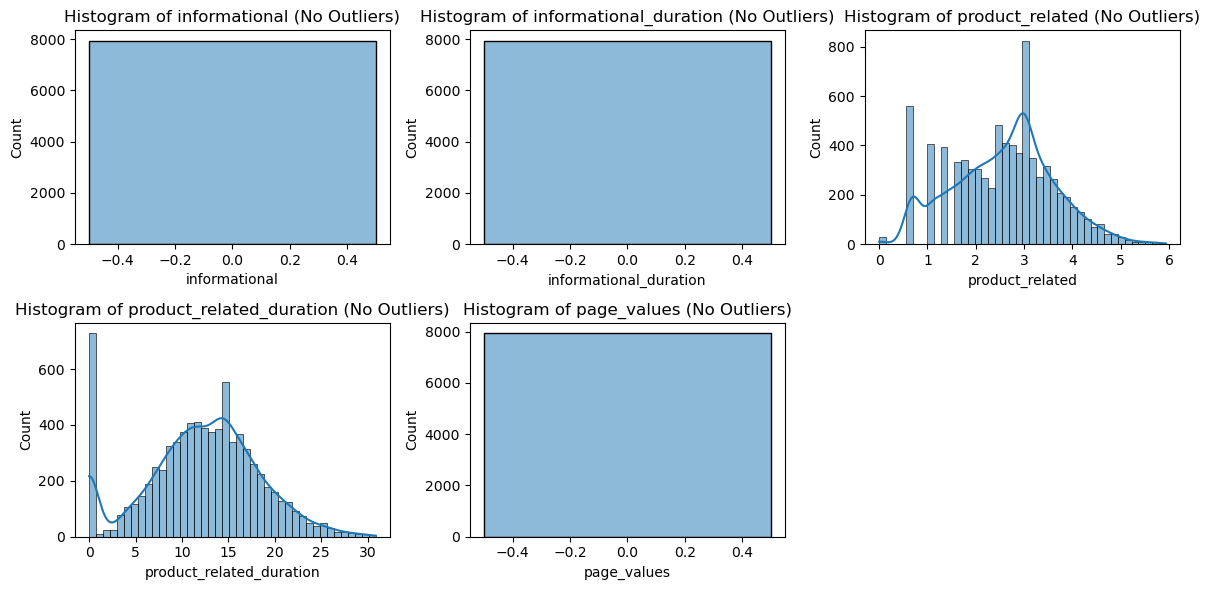

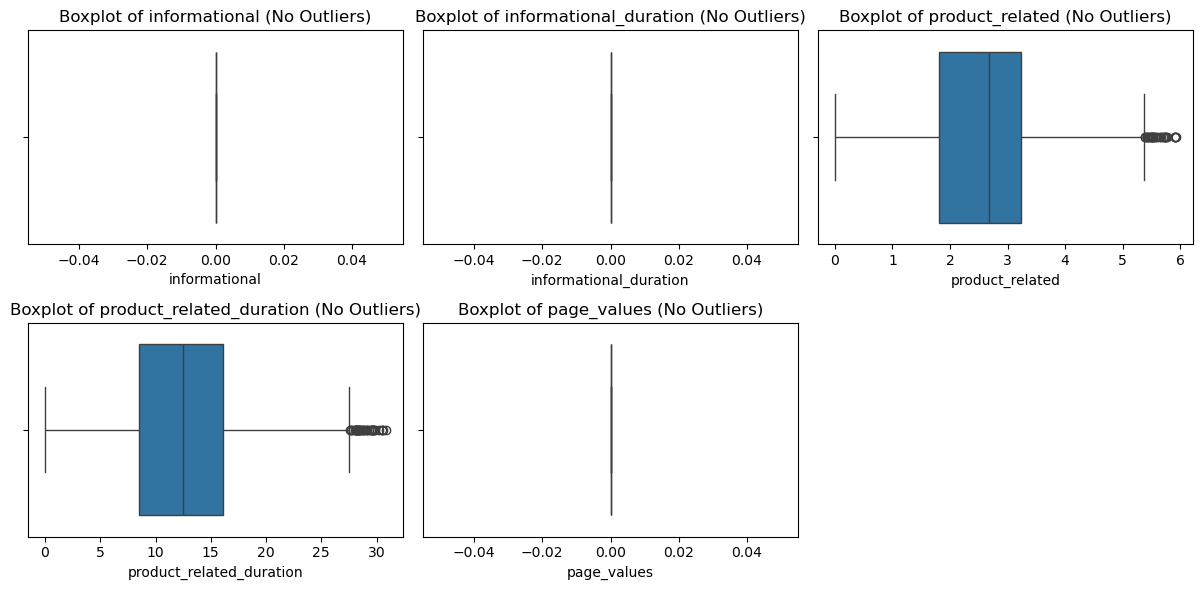

In [26]:

# Load the cleaned dataset
df_cleaned = pd.read_csv("transformed_data_no_outliers.csv")

# Columns to visualize
outlier_cols = ['informational', 'informational_duration', 'product_related', 'product_related_duration', 'page_values']

# Function to plot histograms and boxplots after outlier removal
def plot_cleaned_data(df, columns):
    """Plot histograms and boxplots to visualize data distributions after outlier removal."""
    
    # Histograms
    plt.figure(figsize=(12, 6))
    for i, col in enumerate(columns, 1):
        plt.subplot(2, 3, i)
        sns.histplot(df[col], kde=True)
        plt.title(f"Histogram of {col} (No Outliers)")
    plt.tight_layout()
    plt.show()

    # Boxplots
    plt.figure(figsize=(12, 6))
    for i, col in enumerate(columns, 1):
        plt.subplot(2, 3, i)
        sns.boxplot(x=df[col])
        plt.title(f"Boxplot of {col} (No Outliers)")
    plt.tight_layout()
    plt.show()

# Visualize the specified columns after outlier removal
plot_cleaned_data(df_cleaned, outlier_cols)


##### The above Histogram and Boxplot shows the effects of our transformation. 

##### After dealing with outliers, lets look at the columns that are overly correlated. First we visualise using heatmap then remove any over correlated column which is the standard threshold. For this instance, I will be using 0.8 as threshold.

In [29]:
# Step 2: List highly correlated columns
def list_highly_correlated_columns(df, threshold=0.8):
    """List columns that are highly correlated above the given threshold."""
    numeric_df = df.select_dtypes(include=[np.number])  # Keep only numeric columns
    corr_matrix = numeric_df.corr()

    if corr_matrix.empty:
        print("No numeric columns available for correlation analysis.")
        return []  # Return empty list if no numeric data exists

    correlated_columns = set()
    for col in corr_matrix.columns:
        highly_corr = corr_matrix[col][abs(corr_matrix[col]) > threshold].index.tolist()
        
        # Only remove if col is in the list
        if col in highly_corr:
            highly_corr.remove(col)  
        
        correlated_columns.update(highly_corr)  # Add correlated columns to the set

    return sorted(correlated_columns)  # Convert to sorted list for better readability

# Step 3: Apply the function and list correlated columns
highly_correlated_columns = list_highly_correlated_columns(df_cleaned, threshold=0.8)
print(f"Highly correlated columns to consider for removal: {highly_correlated_columns}")


Highly correlated columns to consider for removal: ['administrative', 'administrative_duration', 'product_related', 'product_related_duration']


##### Now, lets visualise these columns in a heatmap

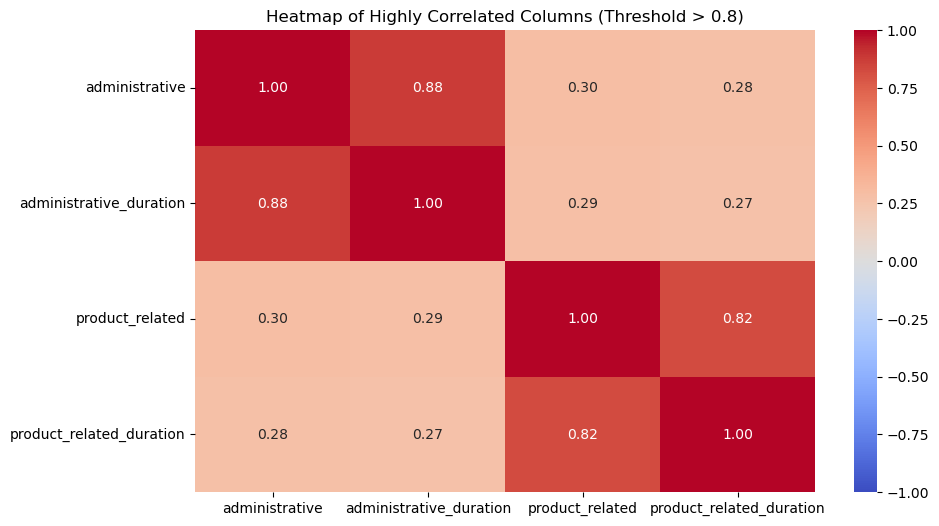

In [30]:
class Plotter:
    """Class to visualize correlations in a heatmap."""
    
    def __init__(self, df):
        self.df = df

    def plot_highly_correlated_heatmap(self, columns, threshold=0.8):
        """Plots a heatmap of the highly correlated columns."""
        if not columns:
            print("No highly correlated columns to visualize.")
            return

        # Filter the DataFrame to keep only the highly correlated columns
        numeric_df = self.df[columns].select_dtypes(include=[np.number])
        
        if numeric_df.empty:
            print("No numeric data available for correlation heatmap.")
            return

        # Compute the correlation matrix
        corr_matrix = numeric_df.corr()

        # Plot the heatmap
        plt.figure(figsize=(10, 6))
        sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
        plt.title(f"Heatmap of Highly Correlated Columns (Threshold > {threshold})")
        plt.show()

# Usage
plotter = Plotter(df_cleaned)
plotter.plot_highly_correlated_heatmap(highly_correlated_columns, threshold=0.8)


##### From the heatmap above, we can see that 'administrative' highly correlates with 'administrative_duration' above our threshold of 0.8. Also 'product_related' is highly correlated with 'product_related_duration'. We therefore move forward to remove one of each. Next we will remove 'product_related' and also remove 'administrative'.

In [31]:
# Remove specific highly correlated columns
columns_to_remove = ['product_related', 'administrative']

# Drop these columns from the dataset
df_cleaned = df_cleaned.drop(columns=columns_to_remove, errors='ignore')

print(f"Removed columns: {columns_to_remove}")
print(f"Remaining columns: {df_cleaned.columns.tolist()}")

Removed columns: ['product_related', 'administrative']
Remaining columns: ['administrative_duration', 'informational', 'informational_duration', 'product_related_duration', 'bounce_rates', 'exit_rates', 'page_values', 'month', 'operating_systems', 'browser', 'region', 'traffic_type', 'visitor_type', 'weekend', 'revenue']


## Milestone 4

### For this part of the project, we will be focusing on providing management with useful insight from the dataframe.

##### The first question is "Are sales proportionally happening more on weekends?" To answer this question, we look at the celaned data using the fist saved copy: 'transformed_data_no_null.csv'

In [1]:
def load_data():
    """Loads the dataset from the correct CSV file."""
    return pd.read_csv('transformed_data_no_null.csv')


In [1]:
import pandas as pd

def load_data():
    """Loads the dataset from the correct CSV file."""
    return pd.read_csv('transformed_data_no_null.csv')

def question_1():
    """Q1: Are sales proportionally happening more on weekends?"""
    df = load_data()
    
    # Count total sales (revenue) on weekends vs. weekdays
    weekend_sales = df[df['weekend'] == 1]['revenue'].sum()
    weekday_sales = df[df['weekend'] == 0]['revenue'].sum()
    
    # Calculate total revenue
    total_sales = weekend_sales + weekday_sales
    
    # Calculate proportions
    weekend_percentage = (weekend_sales / total_sales) * 100
    weekday_percentage = (weekday_sales / total_sales) * 100
    
    # Print results
    print("Sales Breakdown:")
    print(f"Weekend Sales: {weekend_sales} ({weekend_percentage:.2f}%)")
    print(f"Weekday Sales: {weekday_sales} ({weekday_percentage:.2f}%)")
    
    if weekend_sales > weekday_sales:
        print("Sales happen more on weekends.")
    else:
        print("Sales happen more on weekdays.")

# Run the function
question_1()


Sales Breakdown:
Weekend Sales: 432 (22.63%)
Weekday Sales: 1477 (77.37%)
Sales happen more on weekdays.


##### From the output above, we see that sales are not proportionally happening more on weekend. Sales are mostly happening on weekdays (77.37%), while only 22.63% of sales happen on weekends. For proper visualisation, we can plot a pie chart to display this output.

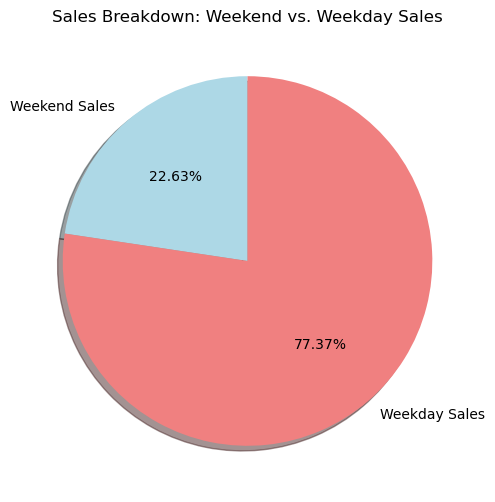

In [2]:
import matplotlib.pyplot as plt

def plot_sales_pie_chart():
    """Plots a pie chart for sales breakdown between weekends and weekdays."""
    labels = ['Weekend Sales', 'Weekday Sales']
    sizes = [432, 1477]  # Sales numbers from your output
    colors = ['lightblue', 'lightcoral']
    
    plt.figure(figsize=(6, 6))
    plt.pie(sizes, labels=labels, autopct='%1.2f%%', colors=colors, startangle=90, shadow=True)
    plt.title('Sales Breakdown: Weekend vs. Weekday Sales')
    plt.show()

# Run the function
plot_sales_pie_chart()


##### The second quesion says 'Which regions are generating the most revenue currently?' To answer this question, we count revenue by region

In [6]:
def question_2():
    """Q2: Which regions are generating the most revenue currently?"""
    df = load_data()
    revenue_by_region = df.groupby('region')['revenue'].sum().sort_values(ascending=False)
    print("Revenue by Region:\n", revenue_by_region)

# Run the function
question_2()


Revenue by Region:
 region
North America      753
Western Europe     323
Eastern Europe     195
Asia               187
Africa             130
South America      130
Northern Africa     91
Oceania             51
Southern Africa     49
Name: revenue, dtype: int64


##### North America is currently generating the most revenue, with 753 recorded sales. This is followed by Western Europe (323) and Eastern Europe (195). The regions generating the least revenue are Oceania (51) and Southern Africa (49).

##### What This Means for Management:
##### North America is the strongest revenue contributor. It may be worth investing more in marketing and customer engagement in this region.
##### Western & Eastern Europe are also performing well, indicating a good market presence.
##### Regions with lower revenue (like Southern Africa and Oceania) might require further analysis such as are there fewer visitors, lower conversion rates, or other barriers?

Lets visualise this 

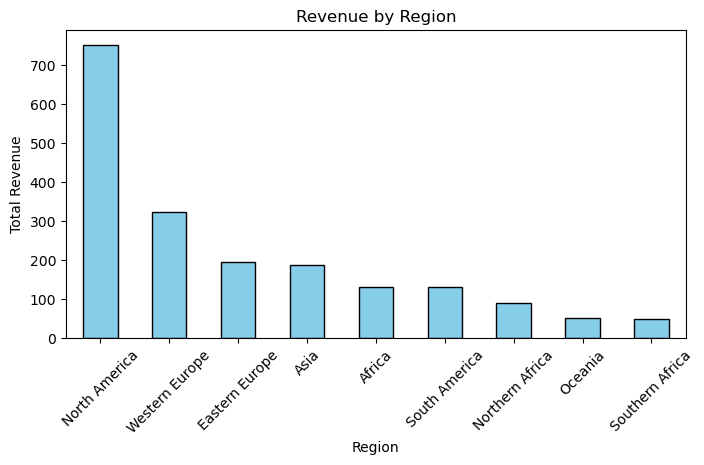

In [7]:
class Plotter:
    @staticmethod
    def plot_revenue_by_region():
        """Plots a bar chart showing revenue distribution by region."""
        df = load_data()
        revenue_by_region = df.groupby('region')['revenue'].sum().sort_values(ascending=False)

        plt.figure(figsize=(8, 4))
        revenue_by_region.plot(kind='bar', color='skyblue', edgecolor='black')
        plt.xlabel('Region')
        plt.ylabel('Total Revenue')
        plt.title('Revenue by Region')
        plt.xticks(rotation=45)
        plt.show()

# Run the plot
Plotter.plot_revenue_by_region()


Next, question 3 asks 'Is there any particular website traffic that stands out when generating sales?' To answer this lets take a look at the traffic Sales Breakdown

In [8]:
def question_3():
    """Q3: Is there any particular website traffic that stands out when generating sales?"""
    df = load_data()
    traffic_sales = df.groupby('traffic_type')['revenue'].sum().sort_values(ascending=False)
    print("Traffic Sales Breakdown:\n", traffic_sales)

# Run the function
question_3()


Traffic Sales Breakdown:
 traffic_type
Google search          875
Facebook ads           266
Bing search            173
Instagram ads          172
Youtube channel         89
Affiliate marketing     83
Twitter                 65
Youtube ads             54
Instagram Page          46
Tik Tok ads             37
Direct Traffic          24
Facebook page           12
Yahoo Search             4
Newsletter               3
Other                    2
Tik Tok page             2
Pinterest                1
Yandex search            1
DuckDuckGo search        0
Name: revenue, dtype: int64


#### Key Insights for Management
##### Google Search (875 sales) dominates in generating revenue, emphasizing the importance of SEO and organic visibility. Facebook Ads (266 sales) performs well among paid channels, suggesting that ad targeting is effective. Bing Search (173) and Instagram Ads (172) also contribute significantly, making them important traffic sources. Direct Traffic (24 sales) is quite low, which may indicate a lack of strong brand recall or returning customers. Tiktok Ads (37) and Tiktok Page (2) have low revenue, suggesting that TikTok may not be a major driver of conversions. DuckDuckGo Search (0) and Pinterest (1) show almost no contribution to revenue, indicating that these platforms might not be worth focusing on for sales.

##### Next question 4 says 'What percentage of time is spent on the website performing administrative/product or informational related tasks?' To get the %, calculate using this formula: Percentage = (Total Time for Each Task / Total Time Spent on All Tasks) × 100


In [9]:
def question_4():
    """Q4: Percentage of time spent on different tasks."""
    df = load_data()
    admin_time = df['administrative_duration'].sum()
    info_time = df['informational_duration'].sum()
    product_time = df['product_related_duration'].sum()
    total_time = admin_time + info_time + product_time

    print("Total time spent on each task:")
    print(f"Administrative Tasks: {admin_time} ({(admin_time/total_time)*100:.2f}%)")
    print(f"Informational Tasks: {info_time} ({(info_time/total_time)*100:.2f}%)")
    print(f"Product-related Tasks: {product_time} ({(product_time/total_time)*100:.2f}%)")

    return admin_time, info_time, product_time

# Run the function
admin_time, info_time, product_time = question_4()


Total time spent on each task:
Administrative Tasks: 965267.20354227 (6.09%)
Informational Tasks: 413633.32836931996 (2.61%)
Product-related Tasks: 14462936.0 (91.30%)


##### Lets visualise the result for clarity and better presentation.

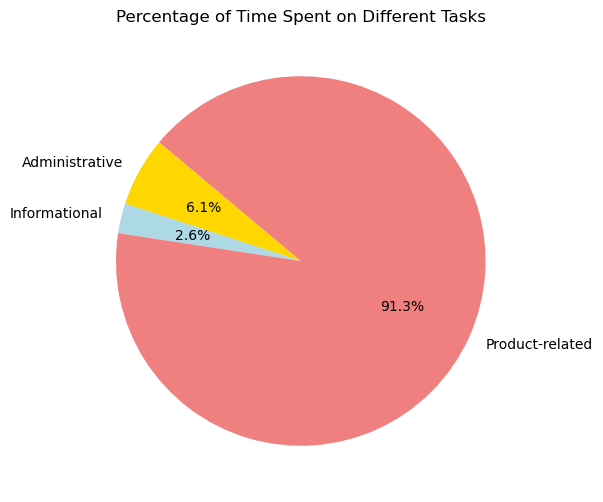

In [10]:
class Plotter:
    @staticmethod
    def plot_task_time(admin_time, info_time, product_time):
        """Plots a pie chart for time spent on different tasks."""
        labels = ['Administrative', 'Informational', 'Product-related']
        sizes = [admin_time, info_time, product_time]
        colors = ['gold', 'lightblue', 'lightcoral']

        plt.figure(figsize=(6, 6))
        plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
        plt.title('Percentage of Time Spent on Different Tasks')
        plt.show()

# Run the plot
Plotter.plot_task_time(admin_time, info_time, product_time)


Next, question 5 reads 'Are there any informational/administrative tasks which users spend time doing most?'

In [11]:
def question_5(admin_time, info_time):
    """Q5: Are there any informational/administrative tasks which users spend time doing most?"""
    if admin_time > info_time:
        print("Users spend more time on Administrative tasks.")
    else:
        print("Users spend more time on Informational tasks.")

# Run the function
question_5(admin_time, info_time)


Users spend more time on Administrative tasks.


##### The final question here asks 'What is the breakdown of months making the most sales?'

In [12]:
def question_6():
    """Q6: Breakdown of months making the most sales."""
    df = load_data()
    sales_by_month = df.groupby('month')['revenue'].sum().sort_values(ascending=False)
    print("Sales by Month:\n", sales_by_month)

# Run the function
question_6()


Sales by Month:
 month
Nov     740
May     342
Dec     274
Mar     181
Oct     133
Aug      74
Sep      71
Jul      67
June     21
Feb       6
Name: revenue, dtype: int64


##### Here, the output shows Nov generated the higest sales, followed by May and Dec.